In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv



In [2]:
# ['testCompleteC45W1P50-0-20240109-11:11:16-14684', 'vector', 'J_Network.queuer', 'jobsQueueLen:vector', '', '', '', '', '', '', '', '', '', '........' , '0 1 .......'

# FILE : testExpP50_25_all.csv
# ROW : [ 'testExpP50-1-20240110-18:12:49-3640',  'vector', 'J_Network.queuer', 'jobsQueueLen:vector', '', '', '', '', '', '', '', '', '', '...tempi...' , '0 1 .......' ]


#   USE ESPONENTIAL OR CONSTANT
use_exp = True

if use_exp == True:
    distribution = "Exp"
elif use_exp == False:
    distribution = "Con"

#   target_tso = ["50"]
detailed = False
if detailed == True :
    target_tso = list(range(25, 55+1, 3) )
else :
    if use_exp == True :
        target_tso = ["25","30","35", "40", "45", "50"]
    elif use_exp == False:
        target_tso = ["25","30","35", "40", "45", "50"]


# USE ALL ITERATIONS OR ONLY FIRST
num_iterations = 30
use_all = False


# PROBABILITY
probability = 50

In [3]:
print(target_tso)

['25', '30', '35', '40', '45', '50']


In [4]:
#   run,type,module,name,attrname,attrvalue,value,count,sumweights,mean,stddev,min,max,vectime,vecvalue
#   vector,J_Network.server_1,completedJob:vector

#   target_tso = ["25"]
    
r1 = "vector"
r2 = "J_Network.server_"
r3 = "completedJob:vector"
server_names = [0, 1]

general_array = []
for srvn in range(0, len(server_names)):
    jrespTime_all_tsos = []
    for tso_this_iter in range(0, len(target_tso), 1) :
        #   print(tso_this_iter)
        jrespTime_all_this_tso = []
        file_name_csv = f'test{distribution}P{probability}_{target_tso[tso_this_iter]}_all.csv'

        with open(f'../simulations/results/{file_name_csv}') as csv_file : 
            reader = csv.reader(csv_file)
            for row in reader:
                if row[1]==r1 and row[2] == f'{r2}{server_names[srvn]}' and row[3]==r3:
                    rigaTarget = list(row)
                    #   print("hit row : ", row)
                    #   print("listed row : ", rigaTarget)
                    #   print("len : ", len(rigaTarget))    #   15 .
                    #   print("13 : ", rigaTarget[13])  #   13 :  88842.22 92268.143 94401.199 97374.126 102381.932
                    #   print("14 : ", rigaTarget[14])  #   14 :  1733.82 1115.235 343.087 879.005 3157.046 1277.006
                    #   print("len 13 : ", len(rigaTarget[13]) )
                    print("len 14 : ", len(rigaTarget[14]) )

                    tempi_risposta = rigaTarget[-1].split(" ")
                    #   numeri = rigaTarget[-1].split(" ")
                    #   for cont in range(0, len(tempi)):
                    #       jrespTime_all_this_tso.append( ( int(numeri[cont]) , float(tempi[cont]) ) )
                    for cont in range(0, len(tempi_risposta)):
                        jrespTime_all_this_tso.append(tempi_risposta[cont])
                    
                    if use_all == False:
                        print("break")
                        break

        jrespTime_all_tsos.append(jrespTime_all_this_tso)
        print(f'{file_name_csv} _ len : {len(jrespTime_all_tsos[tso_this_iter])}' )
    general_array.append(jrespTime_all_tsos)

# now we have all tsos of all !


len 14 :  14818
break
testExpP50_25_all.csv _ len : 1737
len 14 :  15392
break
testExpP50_30_all.csv _ len : 1769
len 14 :  15896
break
testExpP50_35_all.csv _ len : 1784
len 14 :  16710
break
testExpP50_40_all.csv _ len : 1814
len 14 :  17855
break
testExpP50_45_all.csv _ len : 1848
len 14 :  18350
break
testExpP50_50_all.csv _ len : 1737
len 14 :  9082
break
testExpP50_25_all.csv _ len : 1043
len 14 :  8984
break
testExpP50_30_all.csv _ len : 1012
len 14 :  9021
break
testExpP50_35_all.csv _ len : 989
len 14 :  9022
break
testExpP50_40_all.csv _ len : 964
len 14 :  8976
break
testExpP50_45_all.csv _ len : 928
len 14 :  9170
break
testExpP50_50_all.csv _ len : 863


In [5]:
#   for srvn in range(0, len(server_names)):
#       for tso_this_iter in range(0, len(target_tso), 1) :
#           for row in reader:
#               ...
#               if use_all == False:
#                   print("break")
#                   break


print(len(general_array))       #   2
print(general_array[0])
print(len(general_array[0]))    #   6
print(general_array[0][0])

2
[['1733.82', '1115.235', '343.087', '879.005', '3157.046', '1277.006', '41.654', '1146.687', '1665.12', '3679.45', '810.137', '916.535', '1942.043', '845.018', '518.822', '4346.124', '331.16', '2260.249', '2728.112', '3615.298', '7060.153', '7046.1', '5003.569', '146.09', '1768.055', '1095.192', '3135.925', '5105.713', '3375.084', '2650.427', '877.845', '2654.44', '1242.446', '478.346', '279.188', '91.606', '3157.354', '4115.147', '2679.935', '2989.406', '1998.796', '1670.531', '4751.188', '1090.279', '1142.67', '330.13', '1765.885', '512.953', '568.634', '588.051', '1739.938', '2293.962', '2699.316', '797.918', '27.686', '52.153', '2080.308', '1467.369', '6745.966', '1621.022', '2068.476', '531.792', '493.681', '1271.632', '2558.284', '376.783', '163.427', '114.292', '891.022', '950.164', '3849.993', '151.675', '521.39', '3586.78', '509.043', '190.882', '208.942', '1116.027', '29.335', '130.991', '1703.703', '3734.172', '356.678', '3619.41', '3391.945', '3907.746', '2940.874', '1317

In [6]:

#   #   for i in jQueueLen_vector:
#   #       nums.append( int(i[0]))
#   #   print(nums)

general_nums = []
for srvn in range(0, len(server_names)):
    nums_all_tsos = []
    for tso_this_iter in range(0, len(target_tso), 1) :
        nums = []
        for i in range(0, len(general_array[srvn][tso_this_iter]) ):
            #   print( general_array[srvn][tso_this_iter][i] )
            #   print(int(general_array[srvn][tso_this_iter][i]))
            #   #   !!! for histogram we need numbers not strings ! 
            nums.append( float( general_array[srvn][tso_this_iter][i]) )
        nums_all_tsos.append(nums)
        print(f'testExp_{target_tso[tso_this_iter]} len : {len(nums_all_tsos[tso_this_iter])}' )
    general_nums.append(nums_all_tsos)
# got all nums of all tsos

print(general_nums)

testExp_25 len : 1737
testExp_30 len : 1769
testExp_35 len : 1784
testExp_40 len : 1814
testExp_45 len : 1848
testExp_50 len : 1737
testExp_25 len : 1043
testExp_30 len : 1012
testExp_35 len : 989
testExp_40 len : 964
testExp_45 len : 928
testExp_50 len : 863
[[[1733.82, 1115.235, 343.087, 879.005, 3157.046, 1277.006, 41.654, 1146.687, 1665.12, 3679.45, 810.137, 916.535, 1942.043, 845.018, 518.822, 4346.124, 331.16, 2260.249, 2728.112, 3615.298, 7060.153, 7046.1, 5003.569, 146.09, 1768.055, 1095.192, 3135.925, 5105.713, 3375.084, 2650.427, 877.845, 2654.44, 1242.446, 478.346, 279.188, 91.606, 3157.354, 4115.147, 2679.935, 2989.406, 1998.796, 1670.531, 4751.188, 1090.279, 1142.67, 330.13, 1765.885, 512.953, 568.634, 588.051, 1739.938, 2293.962, 2699.316, 797.918, 27.686, 52.153, 2080.308, 1467.369, 6745.966, 1621.022, 2068.476, 531.792, 493.681, 1271.632, 2558.284, 376.783, 163.427, 114.292, 891.022, 950.164, 3849.993, 151.675, 521.39, 3586.78, 509.043, 190.882, 208.942, 1116.027, 29.33

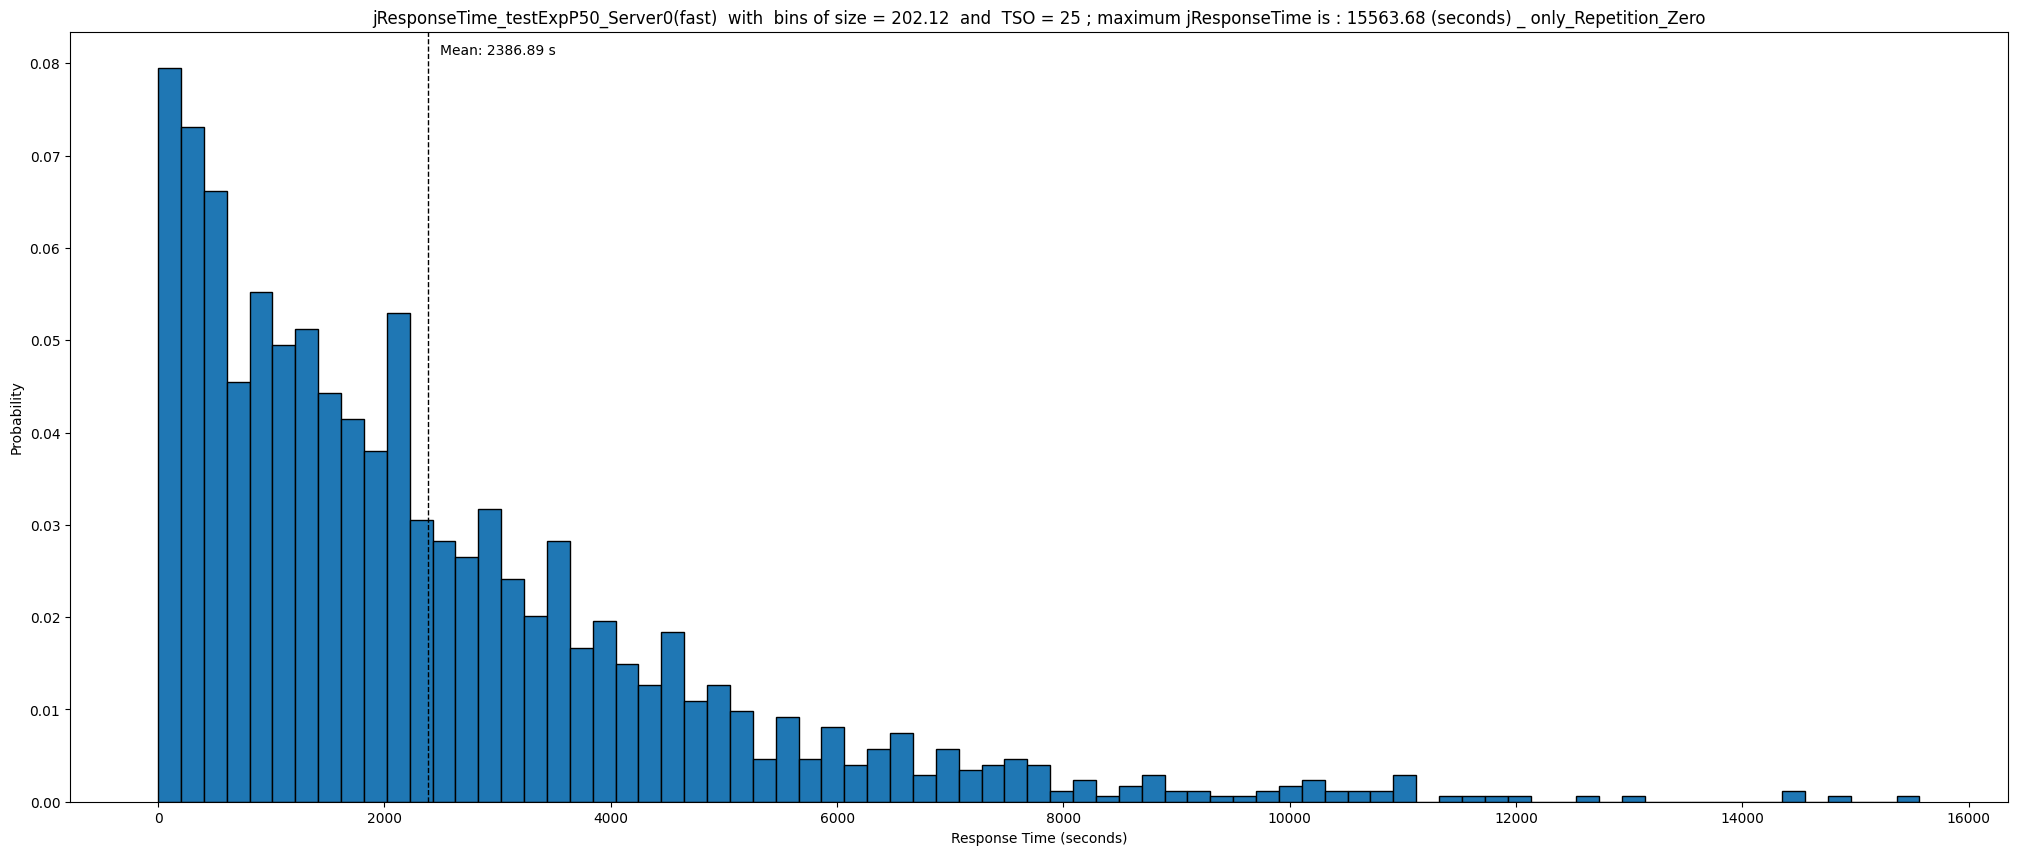

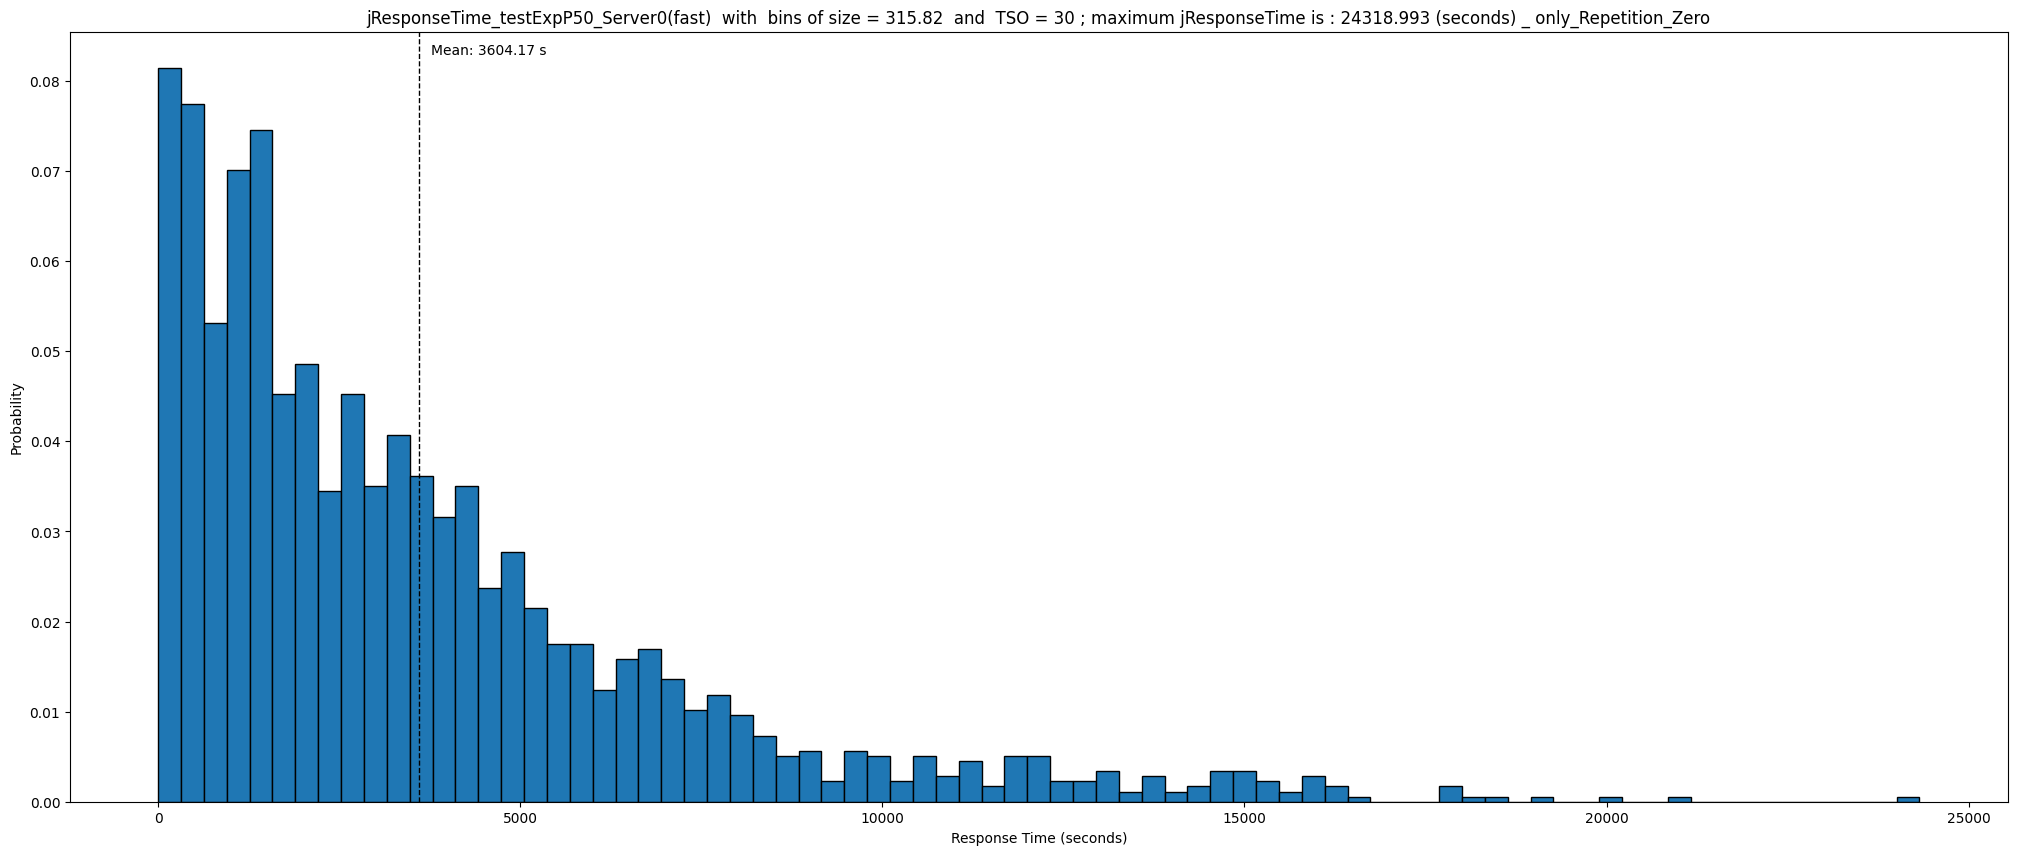

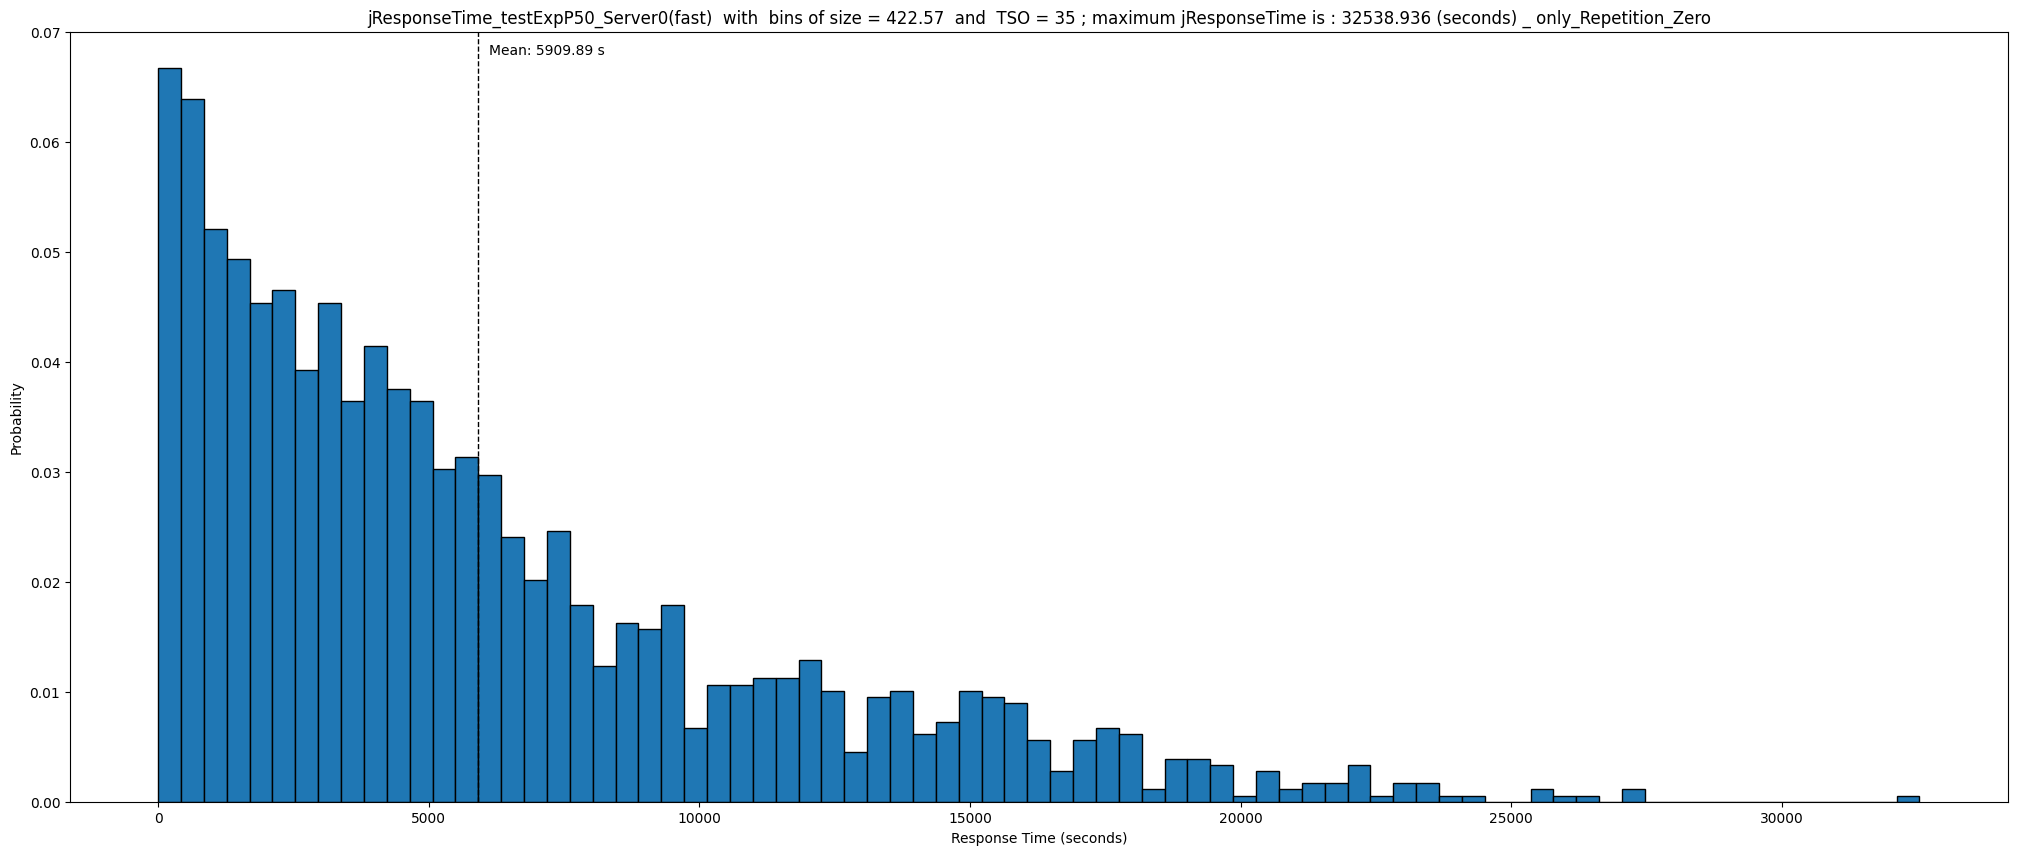

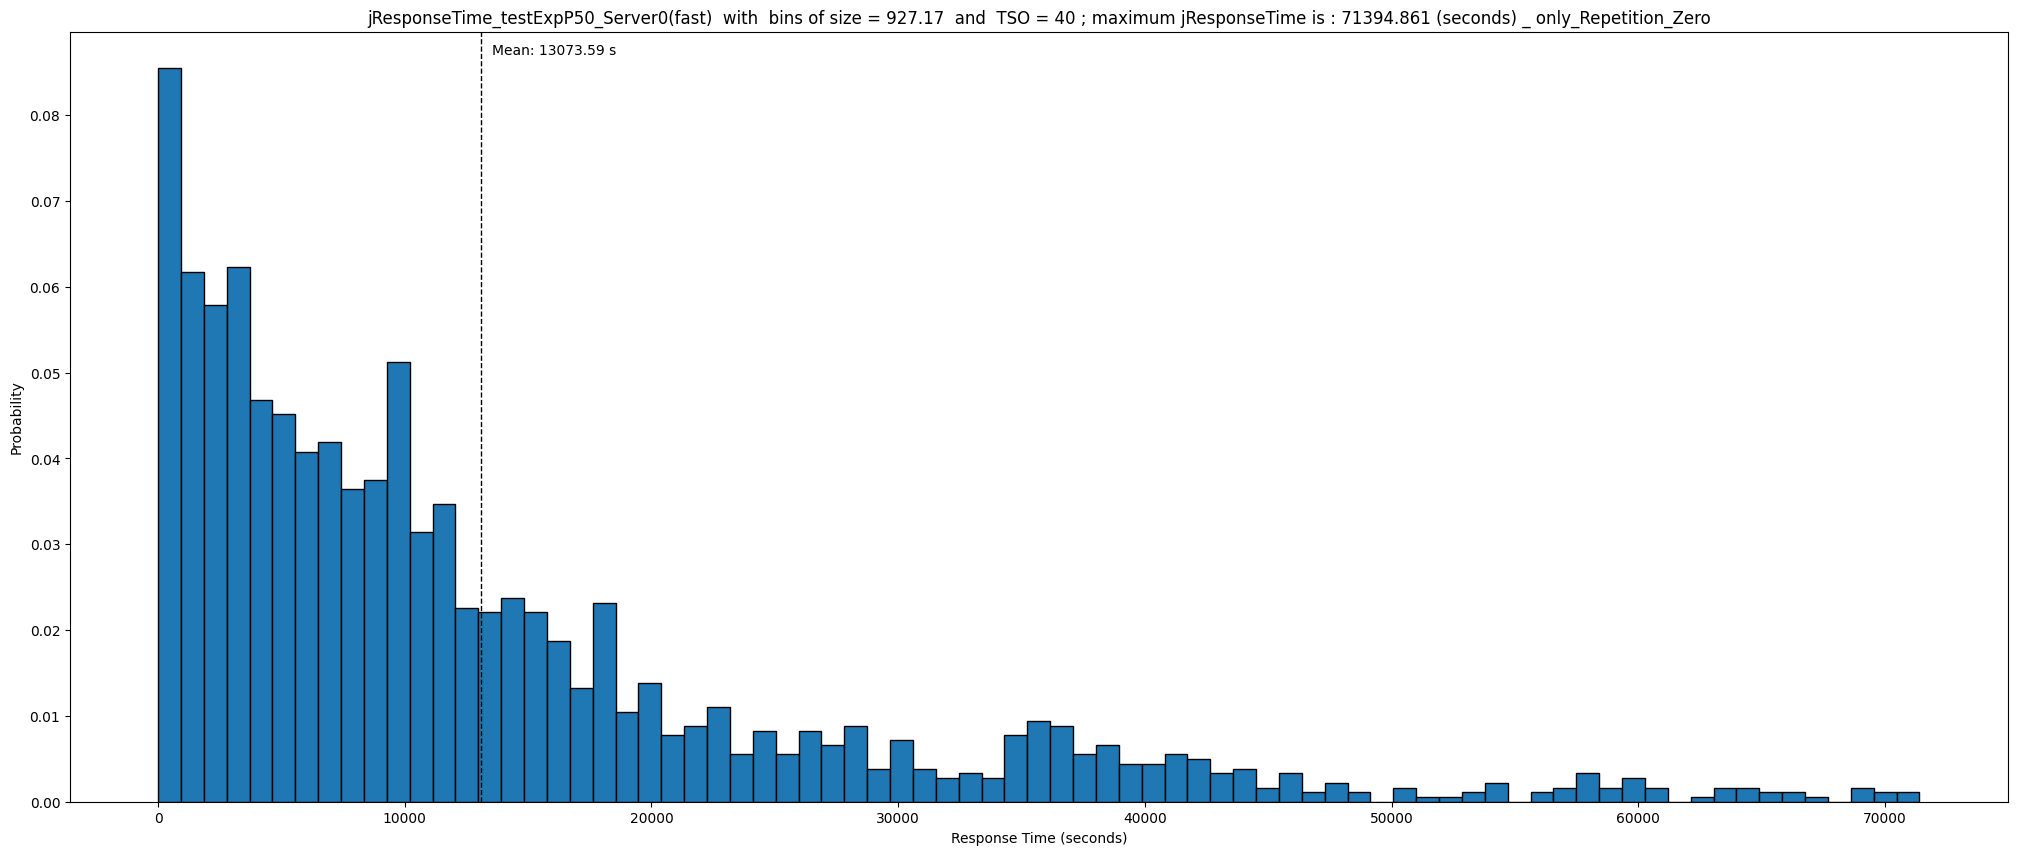

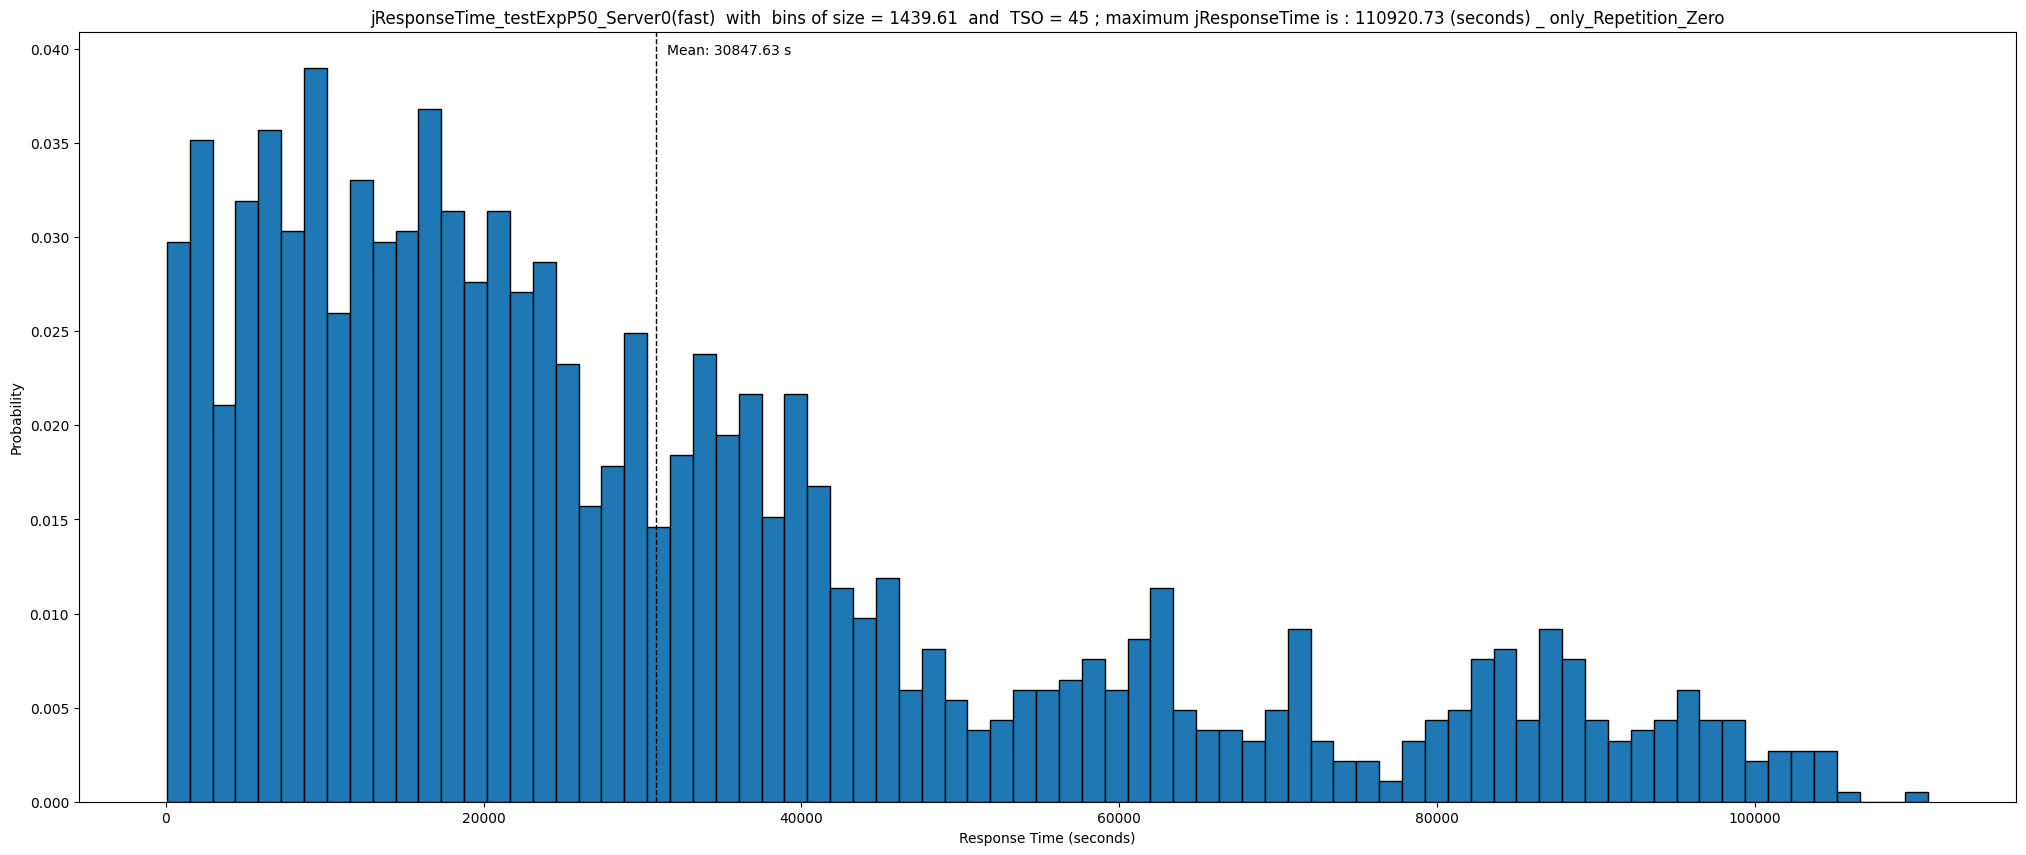

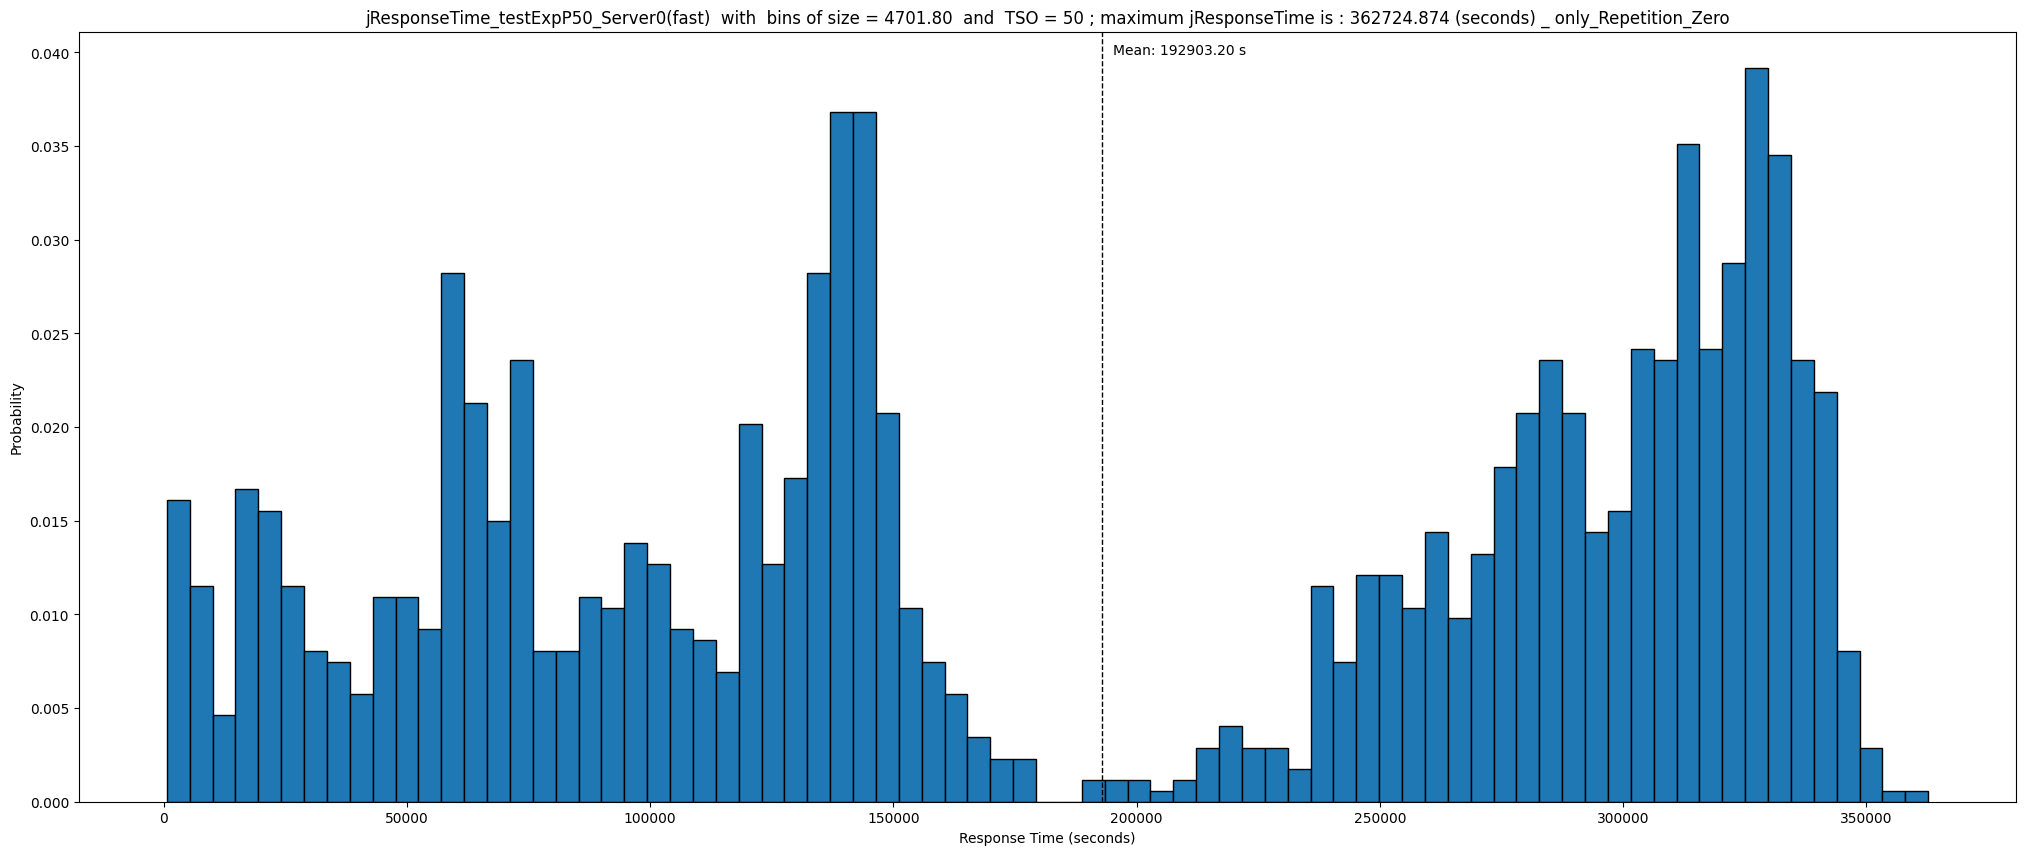

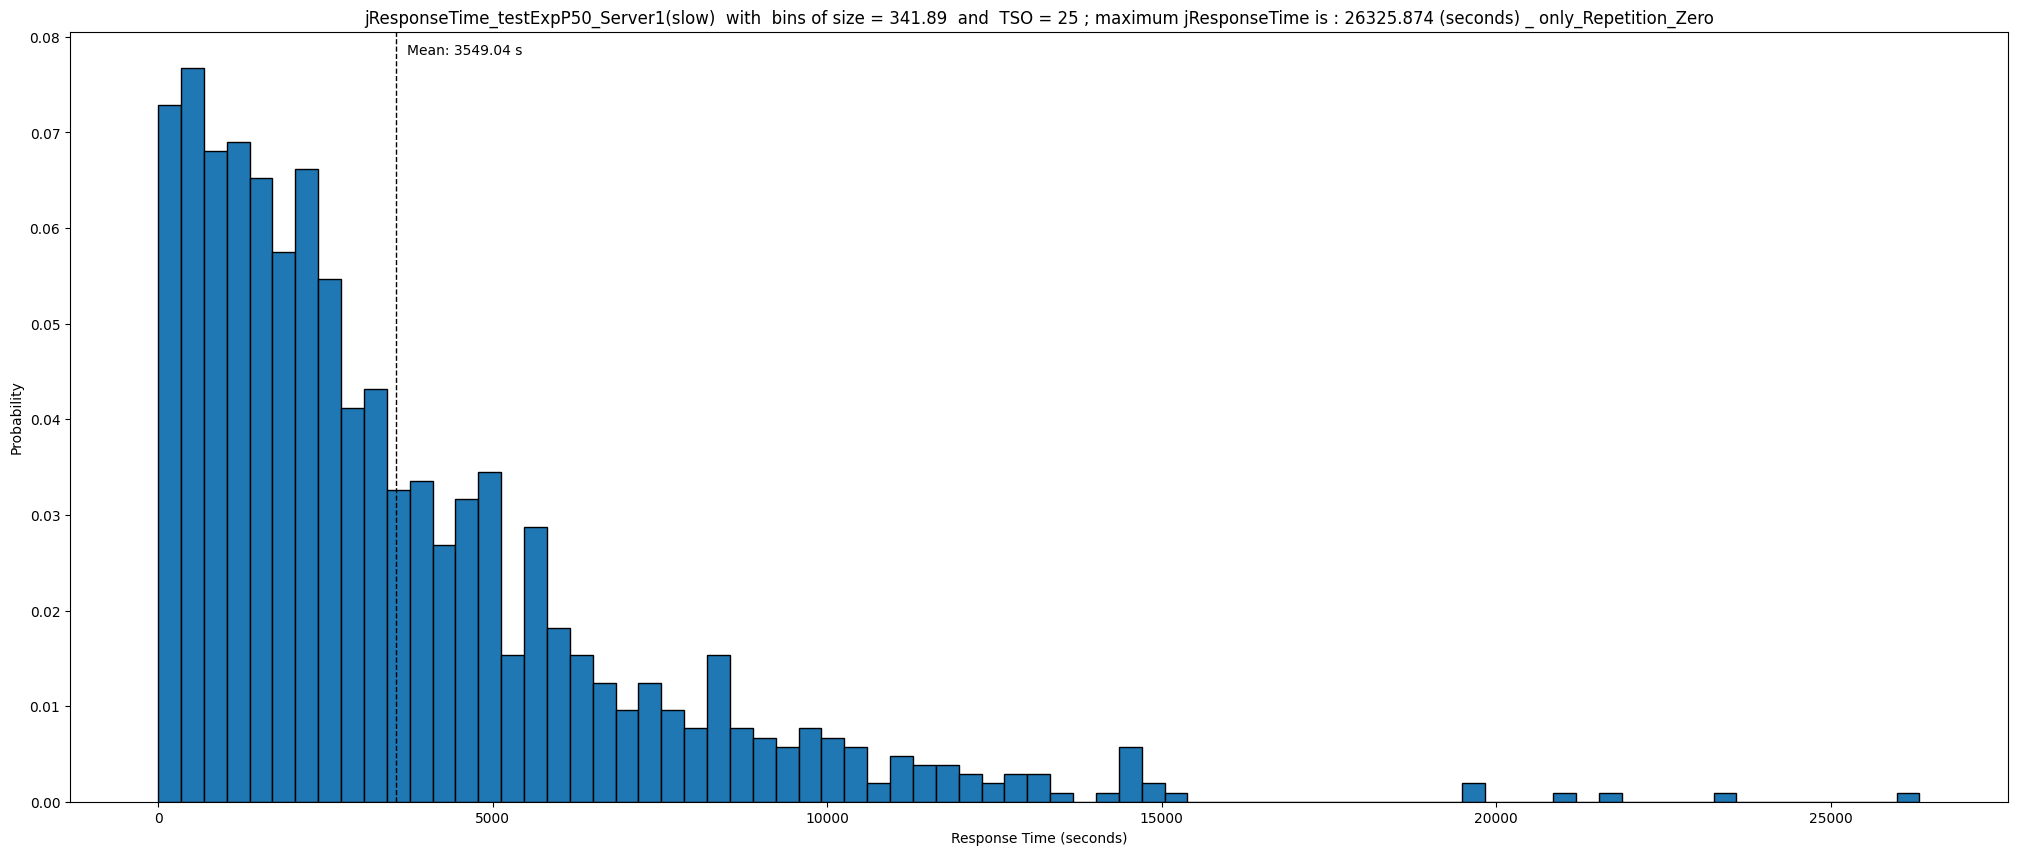

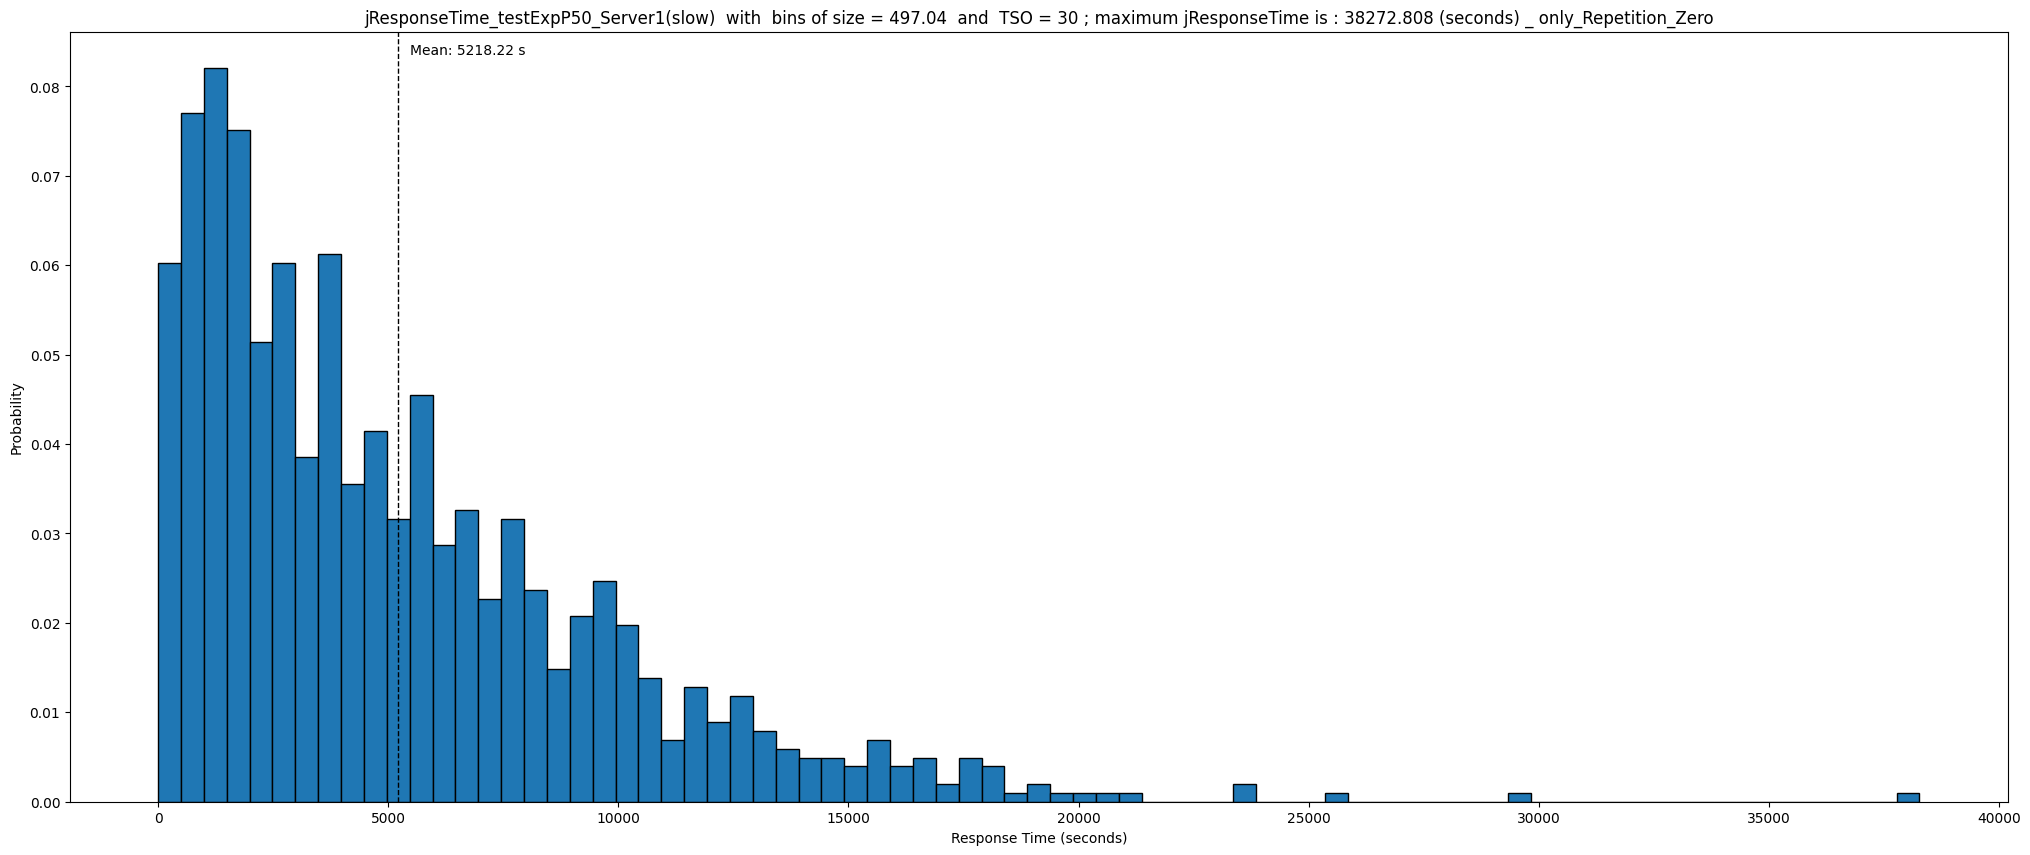

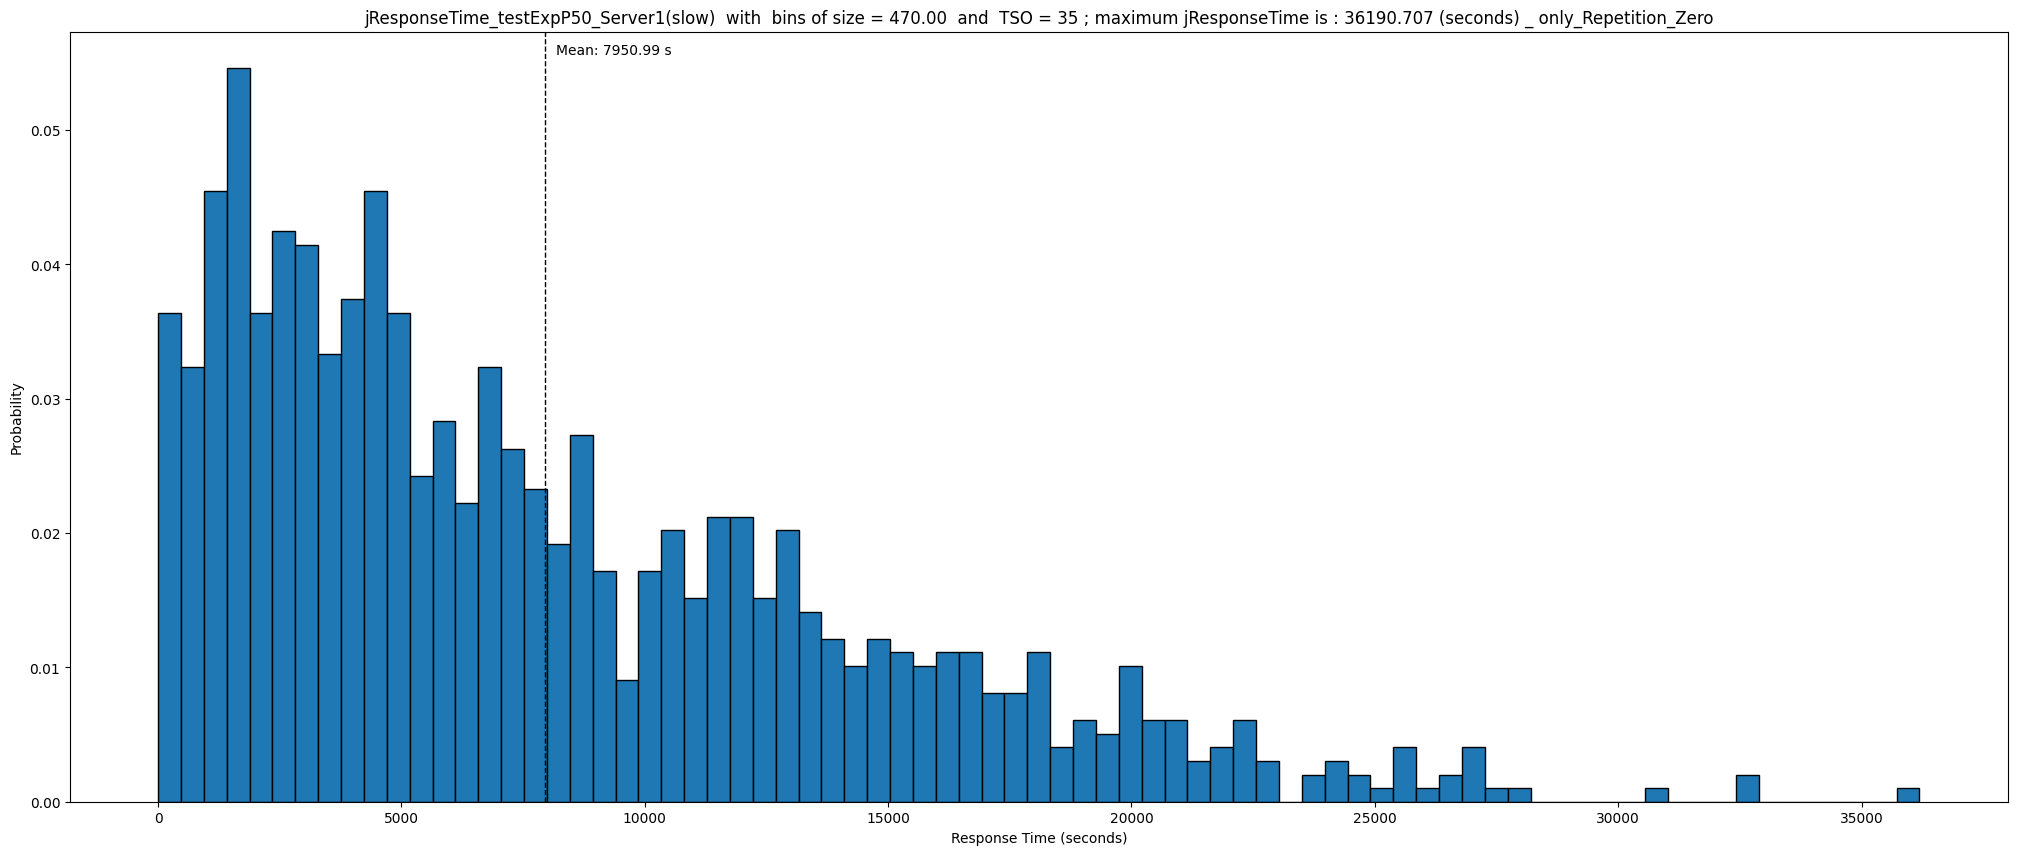

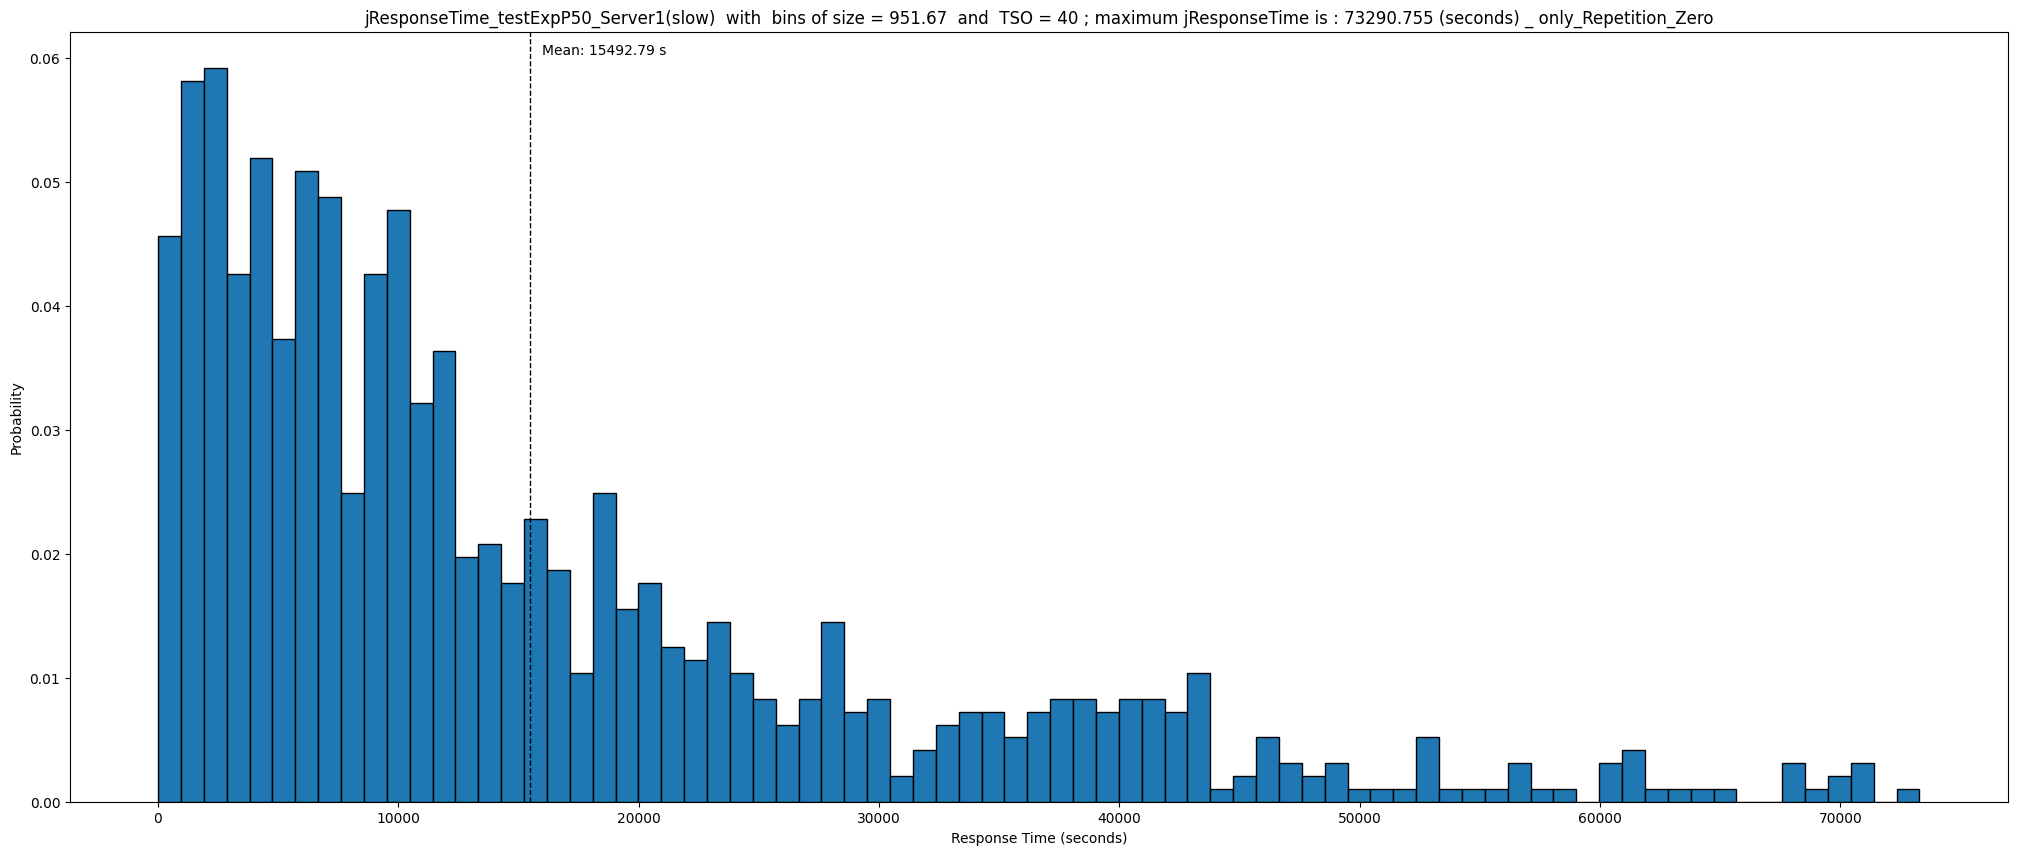

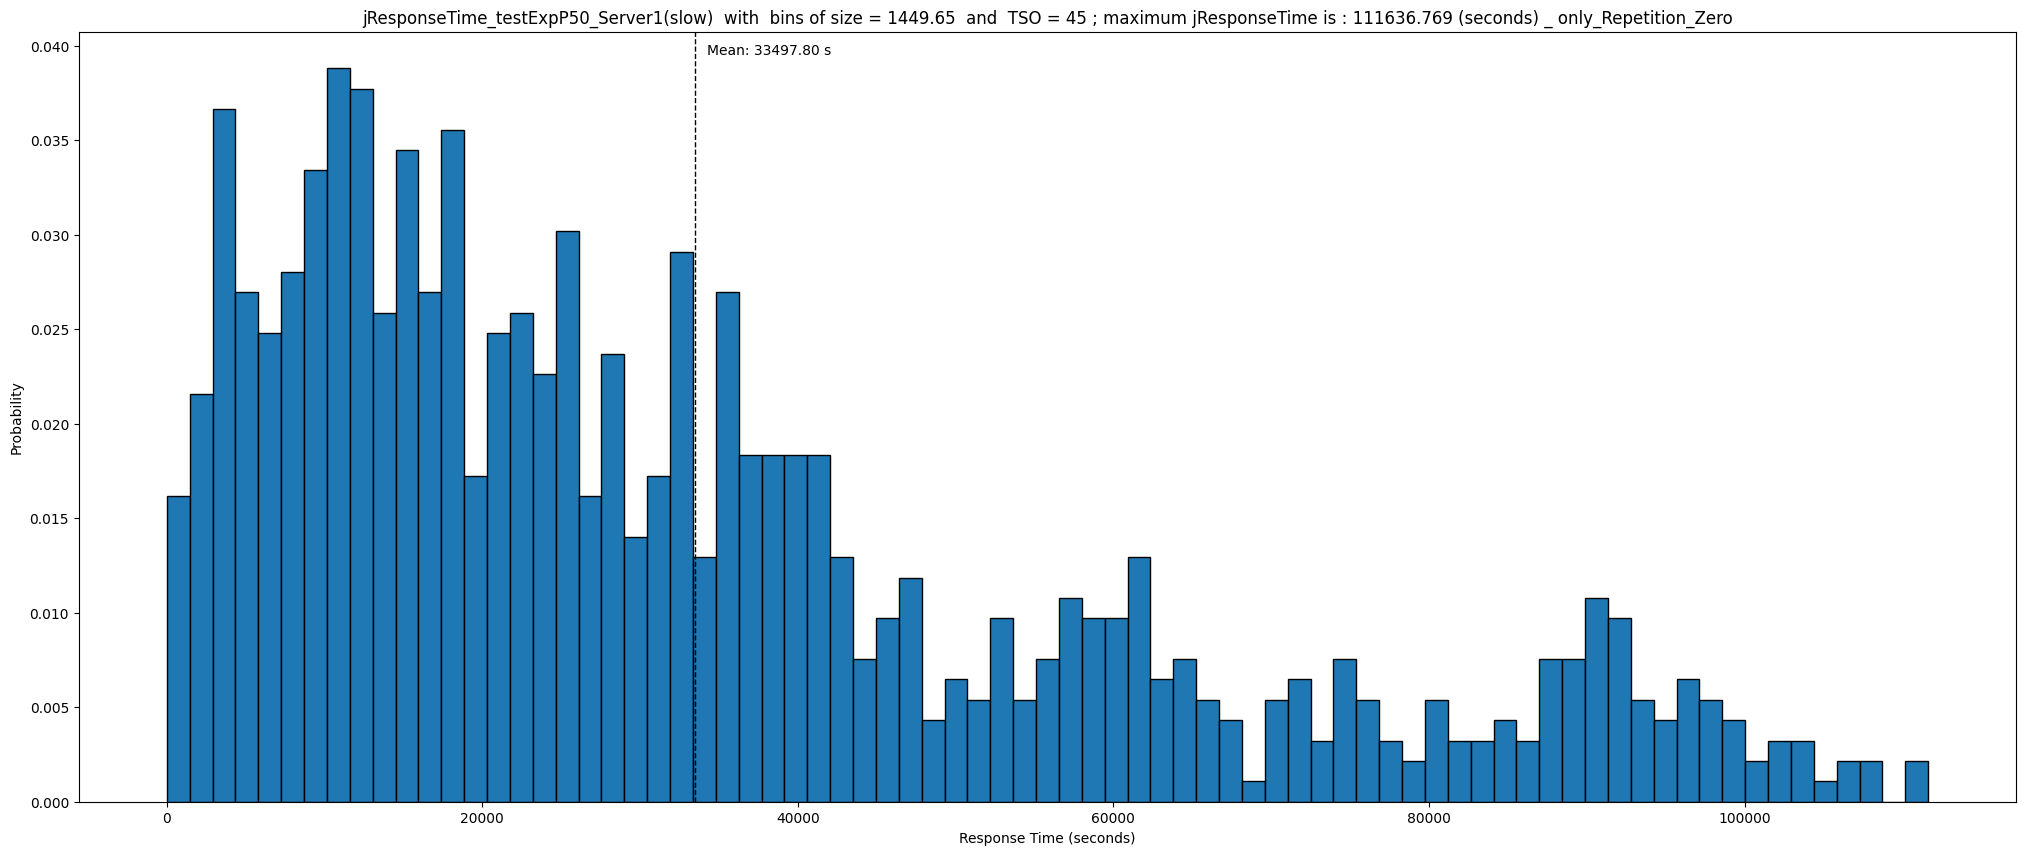

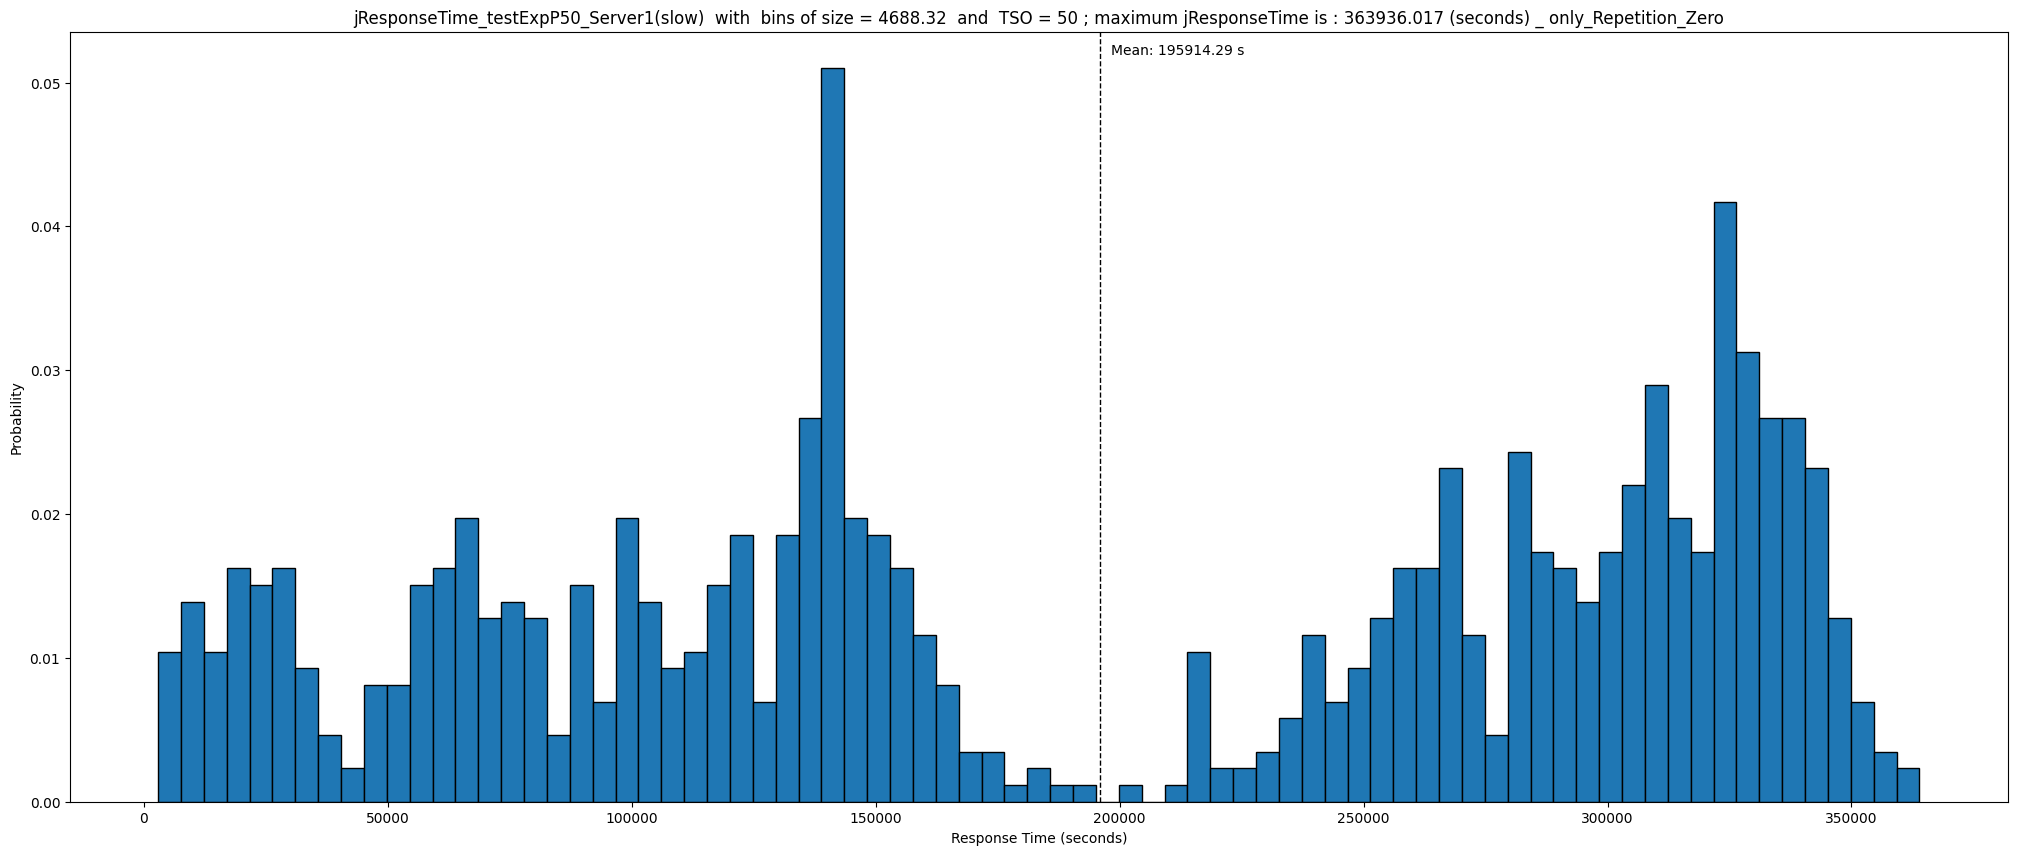

In [7]:
maximum_bins_number = 77

plot_dir = f'../images/plots' 
for srvn in range(0, len(server_names)):
    for tso_this_iter in range(0, len(target_tso), 1) :
        plt.rcParams["figure.figsize"] = (25, 10)
        

        massimo_jResTime = float( max(general_nums[srvn][tso_this_iter]) )
        #   print("massimo_jResTime : ", massimo_jResTime)
        #   bin_size_chosen = 35
        #   if int(target_tso[tso_this_iter]) > 30 and use_exp == False:
        #       bin_size_chosen = int(maximum_bins_number)
        #   print("bin_size_chosen is : ", bin_size_chosen)
        
        counts, bins = np.histogram( general_nums[srvn][tso_this_iter], bins = maximum_bins_number )

        counts = counts / len( general_nums[srvn][tso_this_iter] ) # normalize count
        #   print("counts : ", counts)
        #   print("bins : ", bins)

        #   #   my_massimo_jResTime = max(general_nums[srvn][tso_this_iter])
        #   #   my_bins = []
        #   #   my_counts = []
        #   #   for it in range(0, my_massimo_jResTime+1):
        #   #       #   print("it : ", it)
        #   #       my_bins.append(it-0.5)
        #   #       my_counts.append(0.0)
        #   #       
        #   #   for it in range(0, len(general_nums[srvn][tso_this_iter])):
        #   #       my_counts[general_nums[srvn][tso_this_iter][it]] += 1
        #   #   for it in range(0, len(my_counts)):
        #   #       my_counts[it] = my_counts[it]/len(general_nums[srvn][tso_this_iter])
        #   #   #   print(my_counts)
        #   #   my_bins.append(my_bins[-1]+1)
        #   #   #   print(my_bins)

        bin_width = bins[1]-bins[0]
        hbw = bin_width / 2
        #   bins = bins - hbw

        plt.hist(bins[:-1], bins, weights=counts, edgecolor='black')
        ax = plt.gca()
        ax.yaxis.get_major_formatter().set_scientific(False)
        ax.yaxis.get_major_formatter().set_useOffset(False)
        ax.xaxis.get_major_formatter().set_useOffset(False)
        ax.xaxis.get_major_formatter().set_scientific(False)

        extras = ["fast", "slow"]
        #   plt.hist(counts)
        name = f'jResponseTime_test{distribution}P{probability}_Server{srvn}({extras[srvn]})'
        if use_all == True: 
            plt.title(f"{name}  with  bins of size = {bins[1]-bins[0]:.2f}  and  TSO = {target_tso[tso_this_iter]} ; maximum jResponseTime is : {massimo_jResTime} (seconds) _ use_All_Repetitions")
        else : 
            plt.title(f"{name}  with  bins of size = {bins[1]-bins[0]:.2f}  and  TSO = {target_tso[tso_this_iter]} ; maximum jResponseTime is : {massimo_jResTime} (seconds) _ only_Repetition_Zero")
        
        #   if bin_size_chosen < 50:
        #       plt.xticks(range(0, bin_size_chosen+1 , 1))
        #   if bin_size_chosen < 100:
        #       plt.xticks(range(0, bin_size_chosen+1 , 2))
        #   elif bin_size_chosen < 200:
        #       plt.xticks(range(0, bin_size_chosen+1 , 5))
        #   elif bin_size_chosen < 400:
        #       plt.xticks(range(0, bin_size_chosen+1 , 10))
        #   elif bin_size_chosen < 800:
        #       plt.xticks(range(0, bin_size_chosen+1 , 20))
        
        plt.ylabel("Probability")
        plt.xlabel("Response Time (seconds)")
        

        # print mean !
        target_asNpArray = np.array(general_nums[srvn][tso_this_iter])
        target_mean = target_asNpArray.mean()

        plt.axvline( target_mean , color='k', linestyle='dashed', linewidth=1 )
        min_ylim, max_ylim = plt.ylim()
        
        text_mean_location = target_mean + hbw
        plt.text( text_mean_location, max_ylim*0.97, 'Mean: {:.2f} s'.format(target_mean))


        save = False
        if save == True:
            if use_all == True: 
                plt.savefig(f'{plot_dir}/jResTime_plot{distribution}P{probability}_{target_tso[tso_this_iter]}_Server{srvn}.png')
            else :
                plt.savefig(f'{plot_dir}/jResTime_plot{distribution}P{probability}_{target_tso[tso_this_iter]}_onlyIterZero_Server{srvn}.png')
        
        plt.show()
    

In [8]:
import scipy.stats as sp_st
import matplotlib.pyplot as plt
import itertools as it

In [9]:
nth_quantile = {
	"norm" : sp_st.norm.ppf ,
	"expon" : sp_st.expon.ppf
}



def qqplot(data, dist="expon"):
	n = len(data)
	plt.plot([nth_quantile[dist]((j+0.5)/n) for j in range(n)], sorted(data), 'o')
	plt.plot(plt.xlim(), plt.ylim(), "--", color="lightgrey")

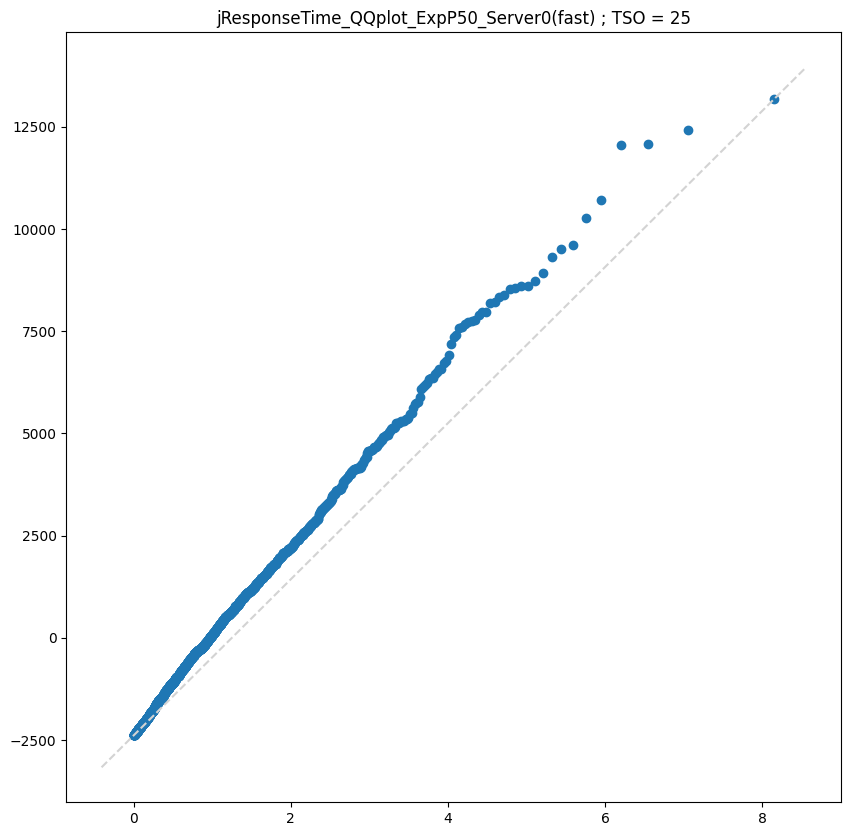

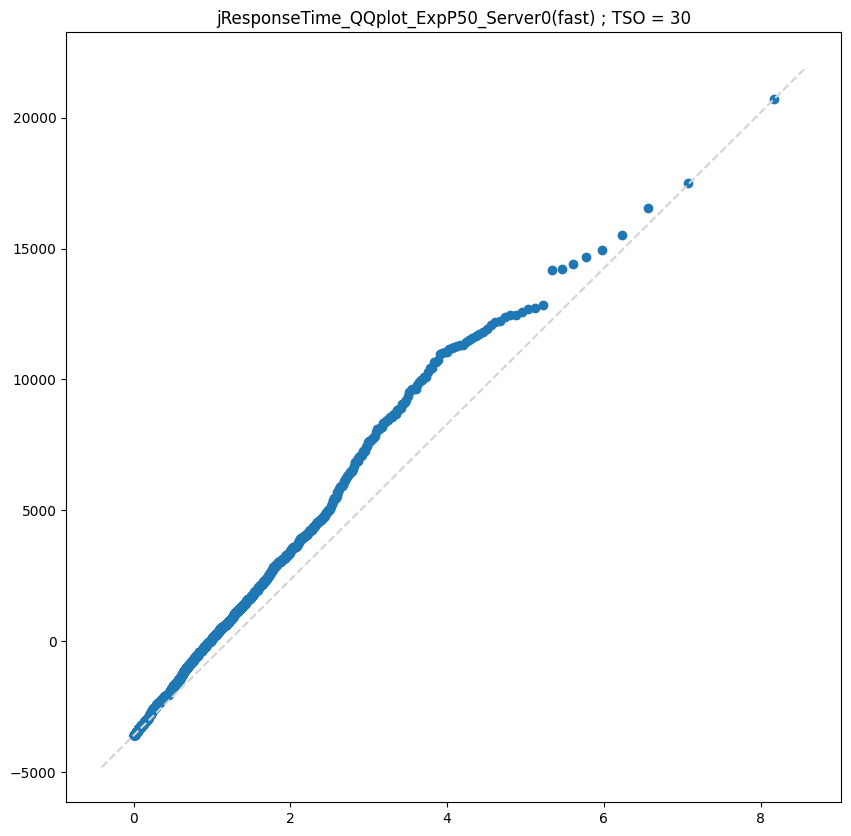

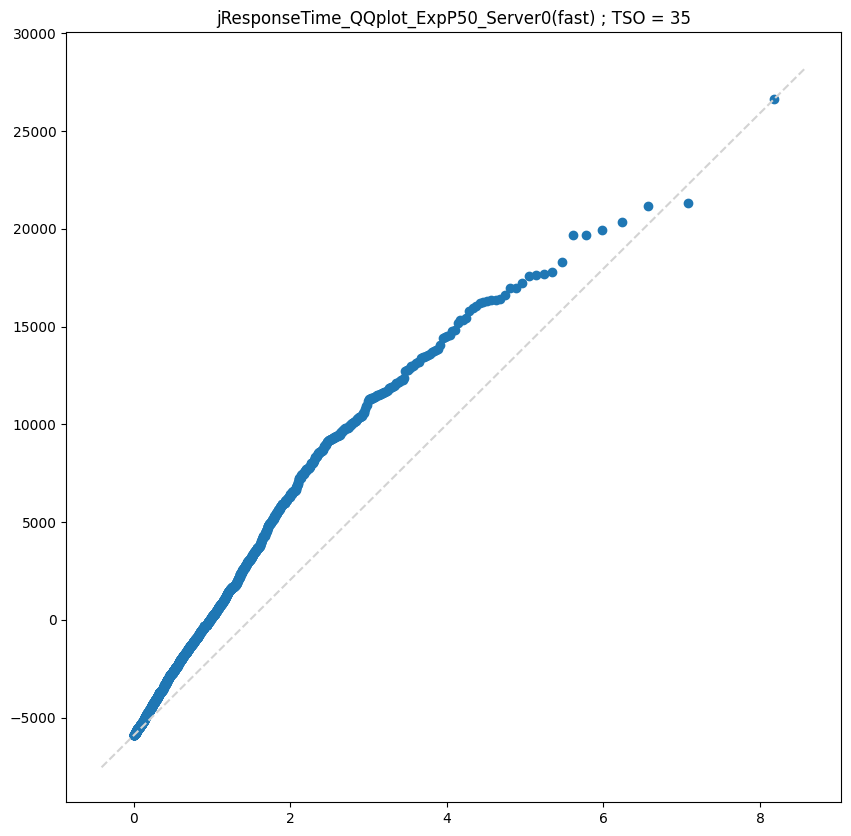

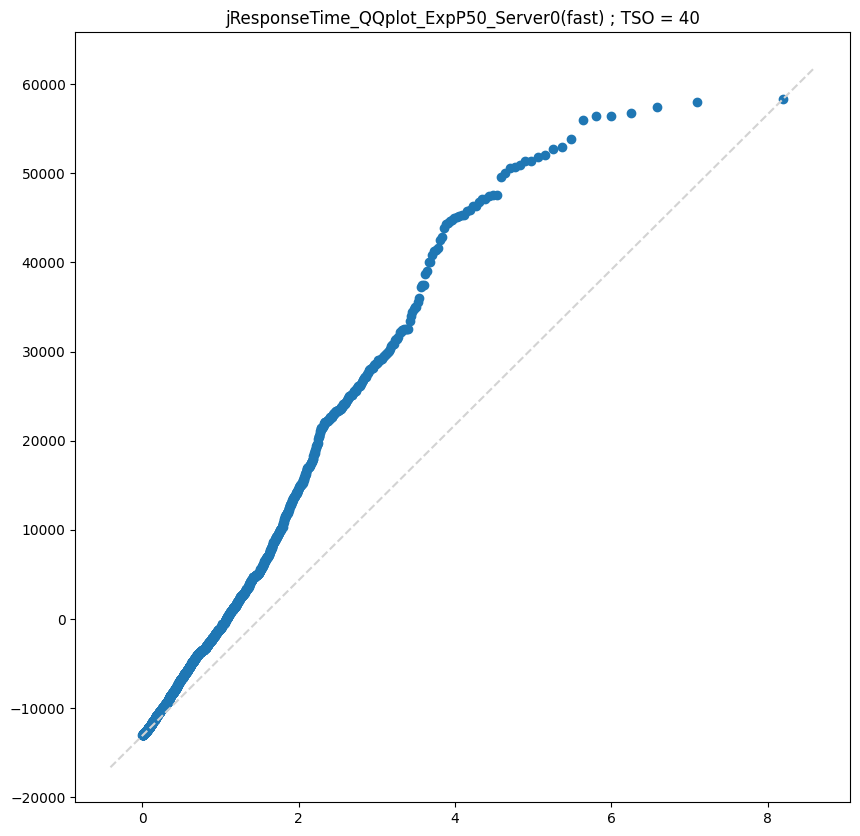

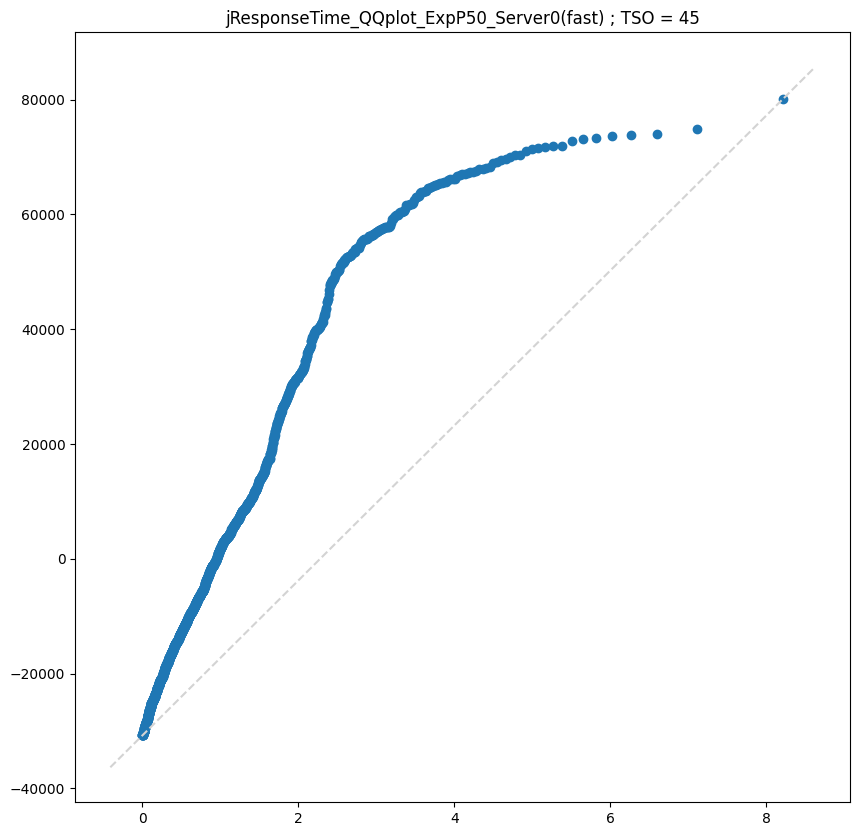

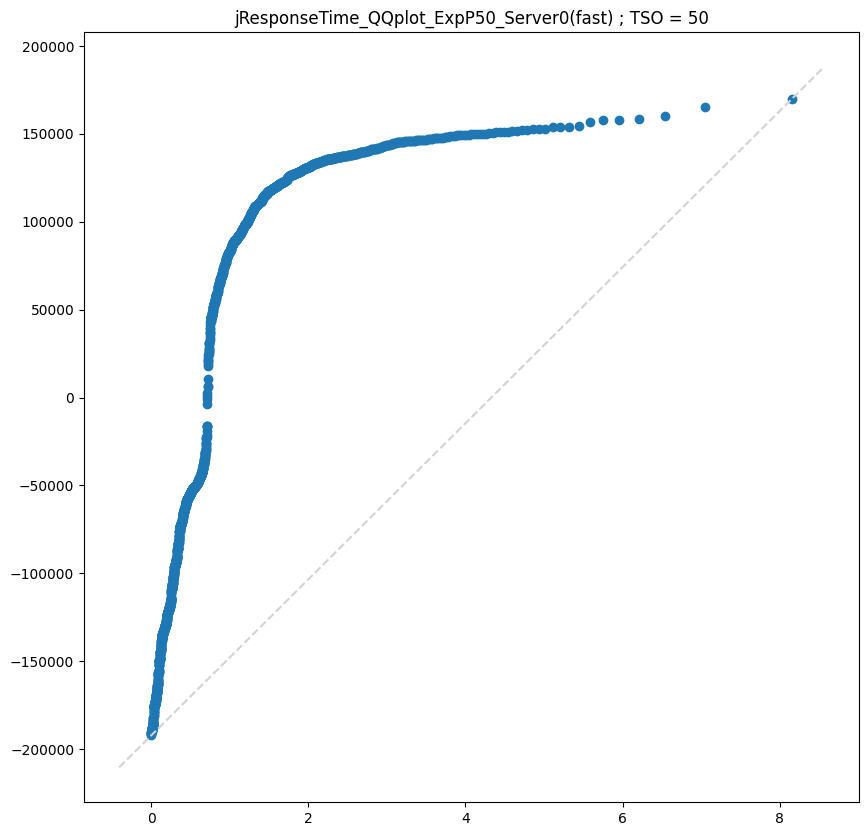

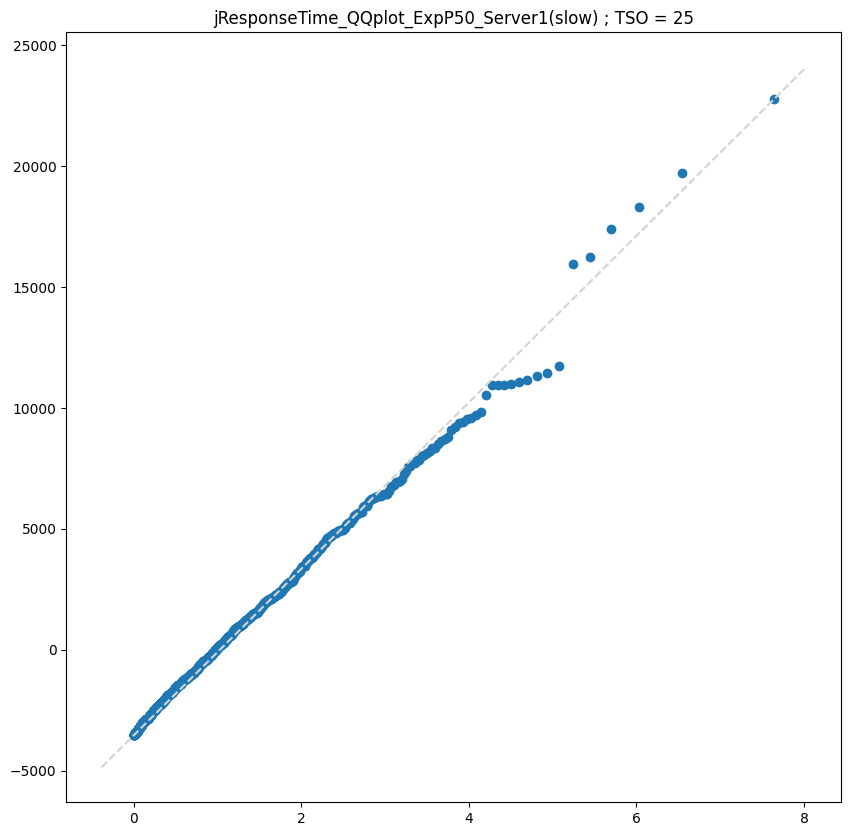

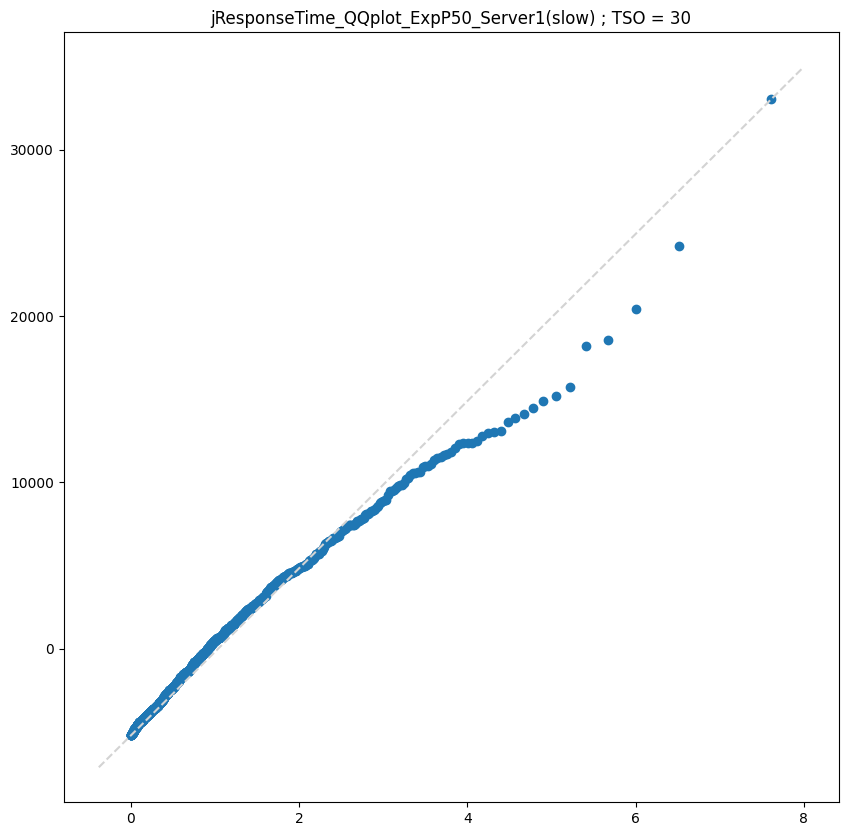

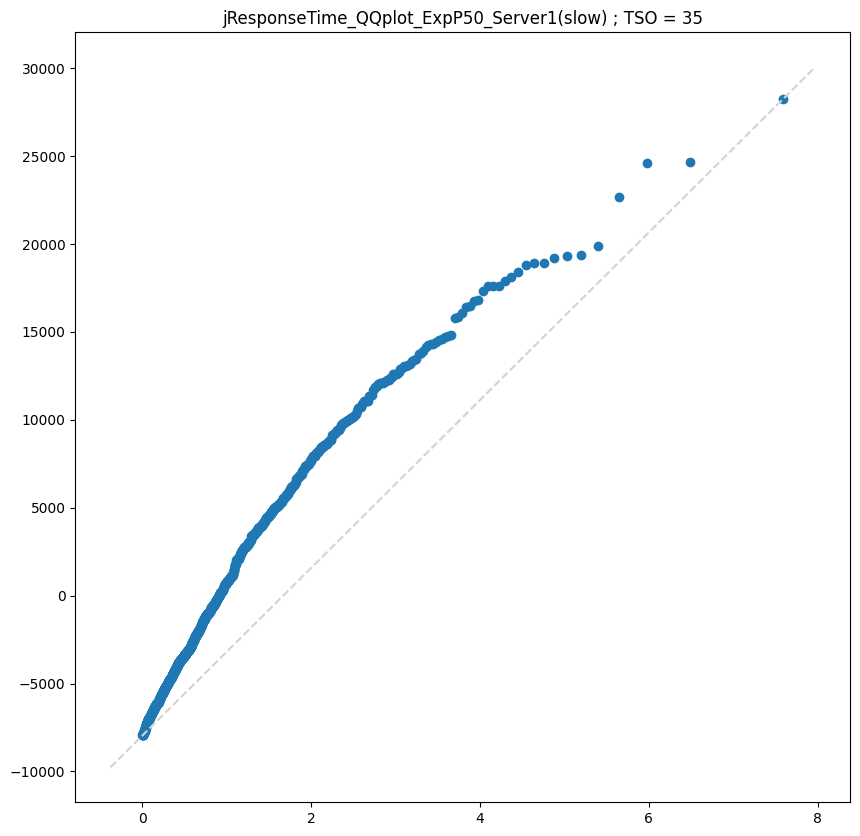

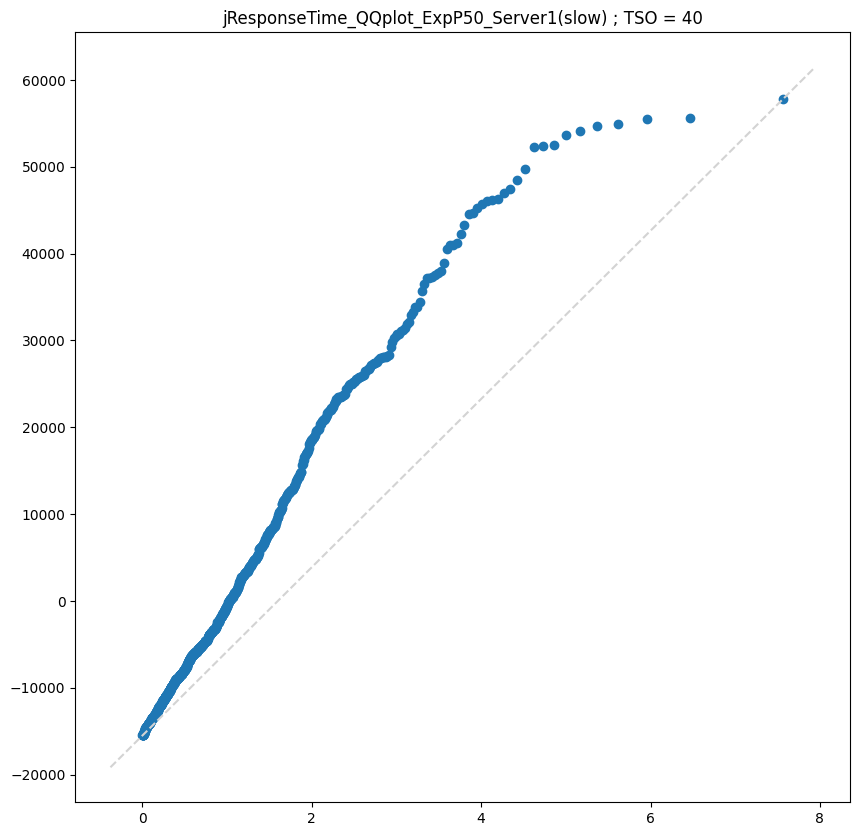

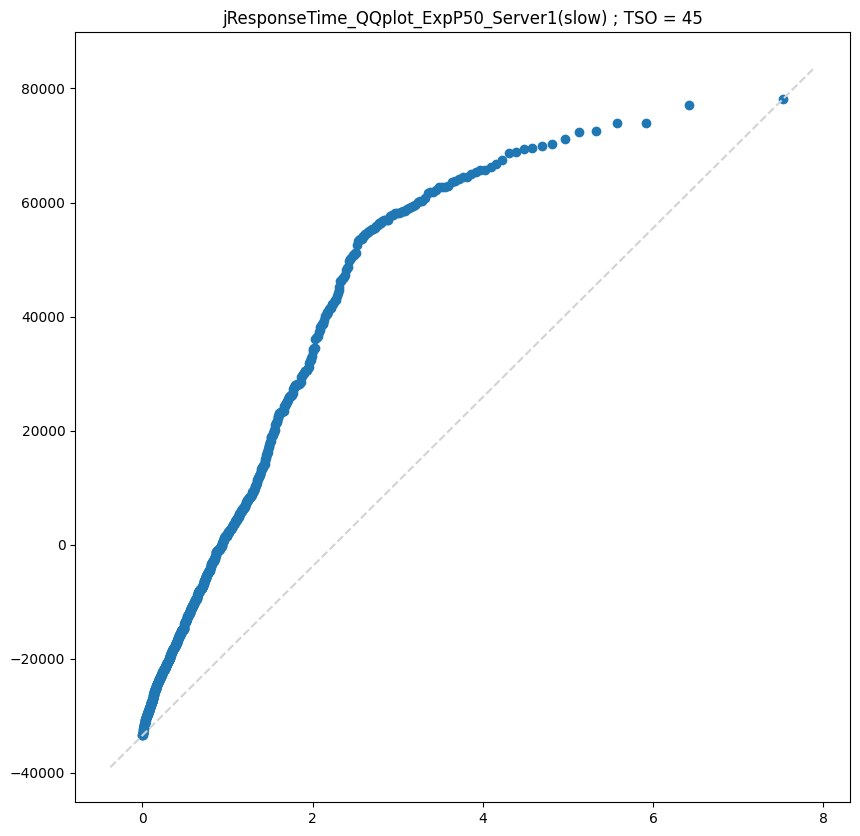

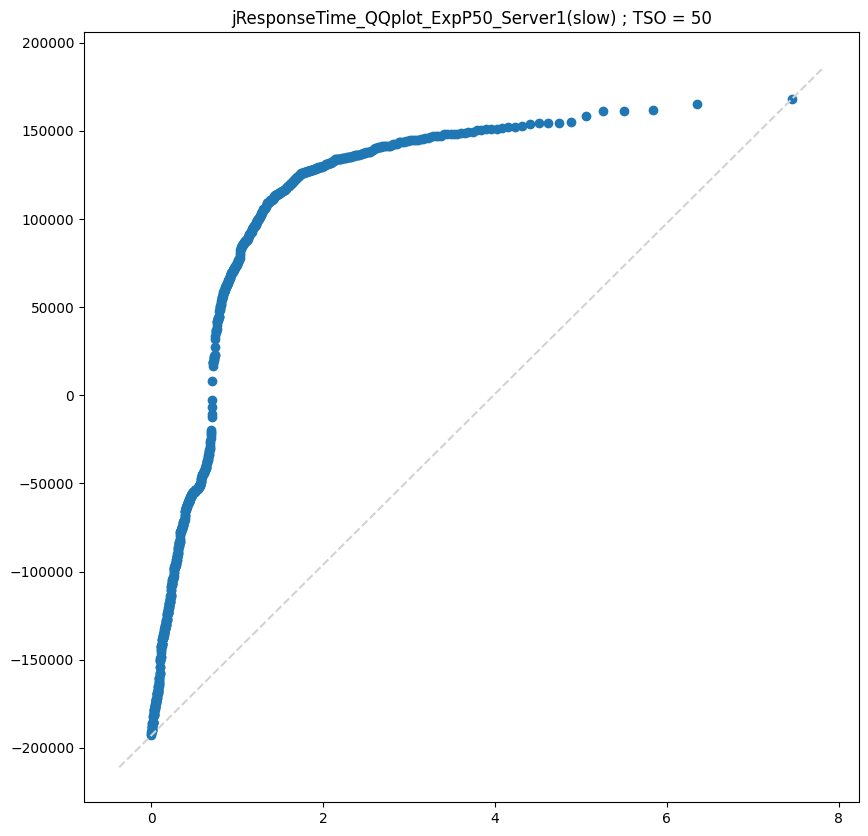

In [10]:
for srvn in range(0, len(server_names), 1 ):
    for tso_this_iter in range(0, len(target_tso), 1 ) :
        plt.rcParams["figure.figsize"] = (10, 10)

        name = f'jResponseTime_QQplot_{distribution}P{probability}_Server{srvn}({extras[srvn]})'

        d = np.array( general_nums[srvn][tso_this_iter] )
        data_mean = d.mean()
        d = d - data_mean
        #   dd = list(it.chain(*[np.mean(v) - v for v in d]))
        #   qqplot(dd)
        qqplot(d)
        plt.title(f'{name} ; TSO = {target_tso[tso_this_iter]}')

        save = False
        if save == True:
            if use_all == True: 
                plt.savefig(f'{plot_dir}/jResponseTime_QQplot_{distribution}P{probability}_{target_tso[tso_this_iter]}_Server{srvn}.png')
            else :
                plt.savefig(f'{plot_dir}/jResponseTime_QQplot_{distribution}P{probability}_{target_tso[tso_this_iter]}_onlyIterZero_Server{srvn}.png')
        

        plt.show()

